# El método del codo y el factor de la silueta del clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X = np.array(list(zip(x1,x2))).reshape(len(x1), 2)
X

array([[3, 5],
       [1, 4],
       [1, 5],
       [2, 6],
       [1, 5],
       [6, 8],
       [6, 6],
       [6, 7],
       [5, 6],
       [6, 7],
       [7, 1],
       [8, 2],
       [9, 1],
       [8, 2],
       [9, 3],
       [9, 2],
       [8, 3]])

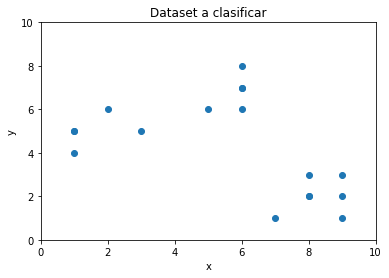

In [ ]:
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title("Dataset a clasificar")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x1, x2)
plt.show()

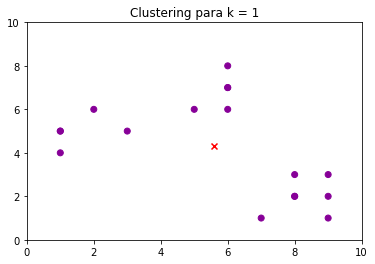

* Para k=  2  2l promedio de la silueta es de  : 0.6113424368705715
       - Para i =  1  la silueta del cluster vale:  0.7746251901389686
       - Para i =  2  la silueta del cluster vale:  0.49704450958269375


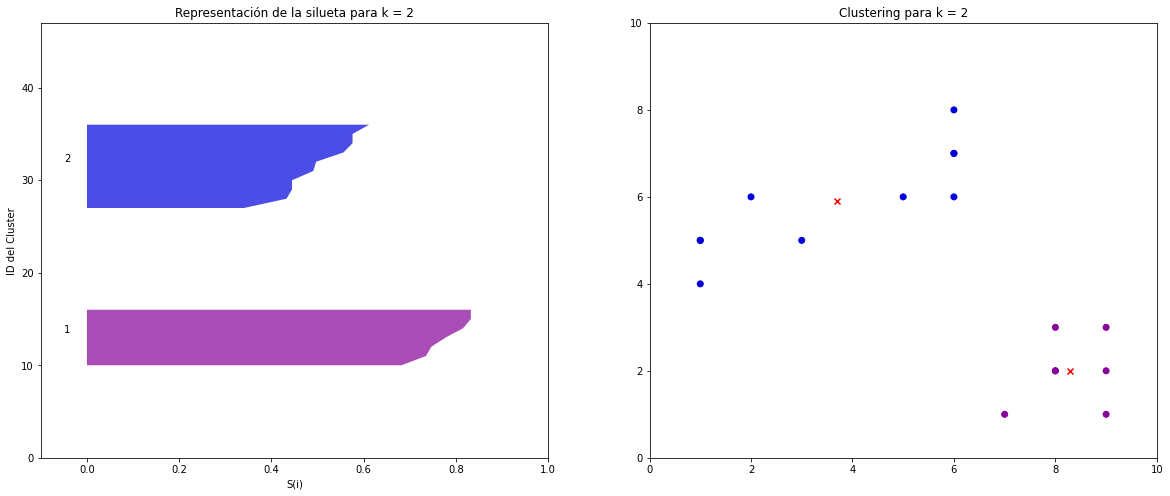

* Para k=  3  2l promedio de la silueta es de  : 0.7122079383287169
       - Para i =  1  la silueta del cluster vale:  0.7345257364682265
       - Para i =  2  la silueta del cluster vale:  0.7322200728725188
       - Para i =  3  la silueta del cluster vale:  0.6609508863896014


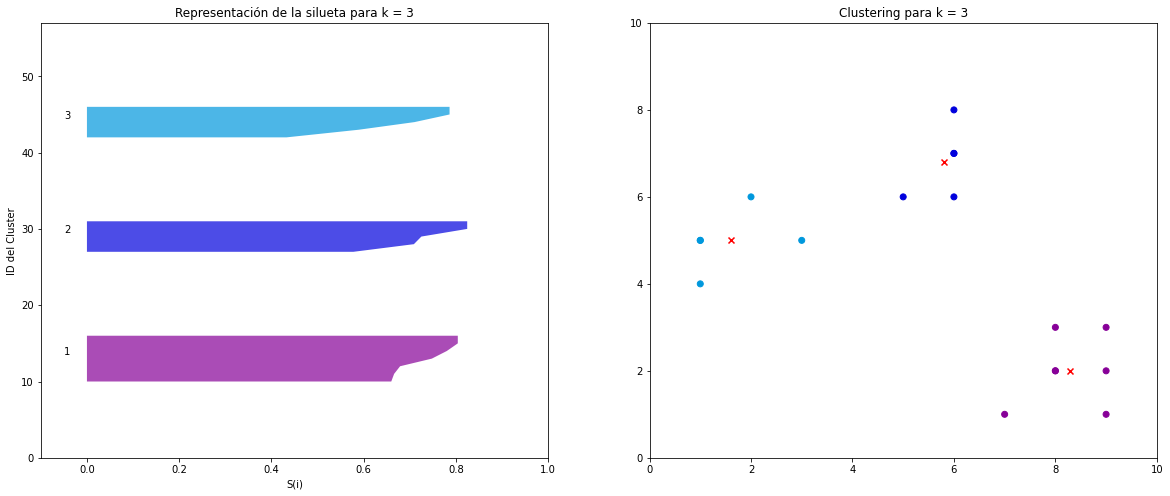

* Para k=  4  2l promedio de la silueta es de  : 0.6389948643127632
       - Para i =  1  la silueta del cluster vale:  0.654458796162702
       - Para i =  2  la silueta del cluster vale:  0.7345257364682265
       - Para i =  3  la silueta del cluster vale:  0.655666655624379
       - Para i =  4  la silueta del cluster vale:  0.24096929517637128


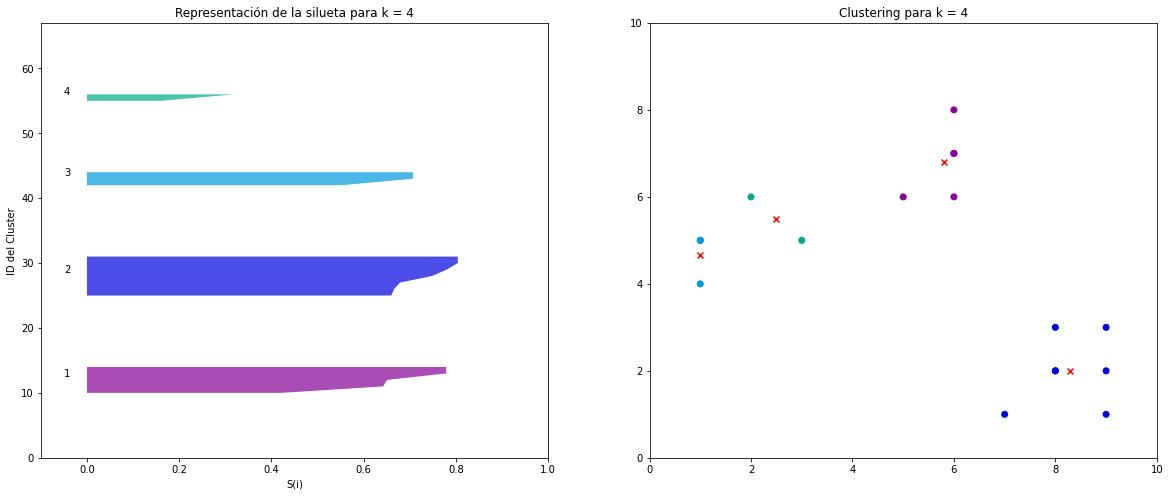

* Para k=  5  2l promedio de la silueta es de  : 0.46983374375750137
       - Para i =  1  la silueta del cluster vale:  0.0
       - Para i =  2  la silueta del cluster vale:  0.654458796162702
       - Para i =  3  la silueta del cluster vale:  0.655666655624379
       - Para i =  4  la silueta del cluster vale:  0.37765685097302226
       - Para i =  5  la silueta del cluster vale:  0.24096929517637128


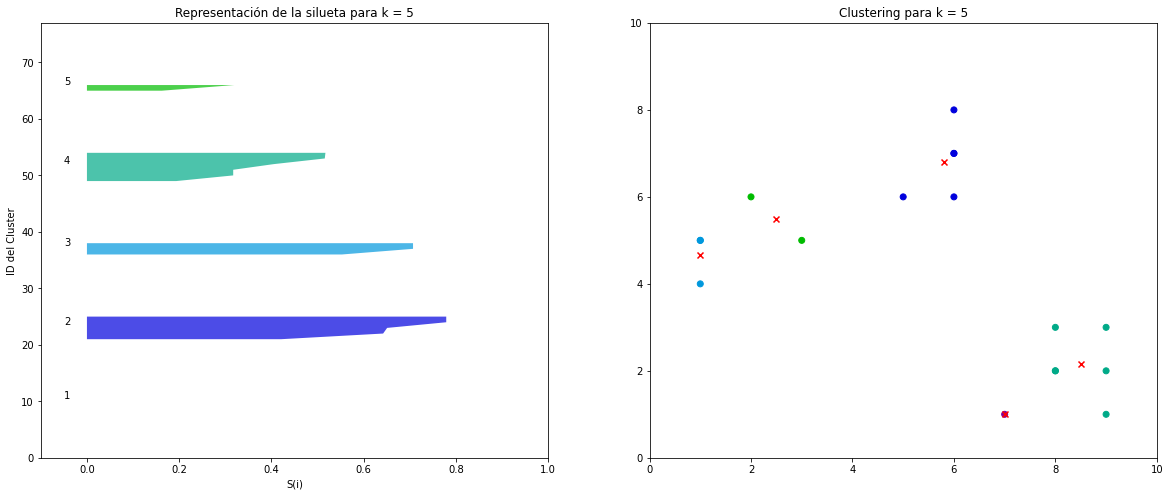

* Para k=  6  2l promedio de la silueta es de  : 0.39661977826122785
       - Para i =  1  la silueta del cluster vale:  0.42346712707864664
       - Para i =  2  la silueta del cluster vale:  0.24096929517637128
       - Para i =  3  la silueta del cluster vale:  0.5664789734180768
       - Para i =  4  la silueta del cluster vale:  -0.09040786759303471
       - Para i =  5  la silueta del cluster vale:  0.32882042637679976
       - Para i =  6  la silueta del cluster vale:  0.655666655624379


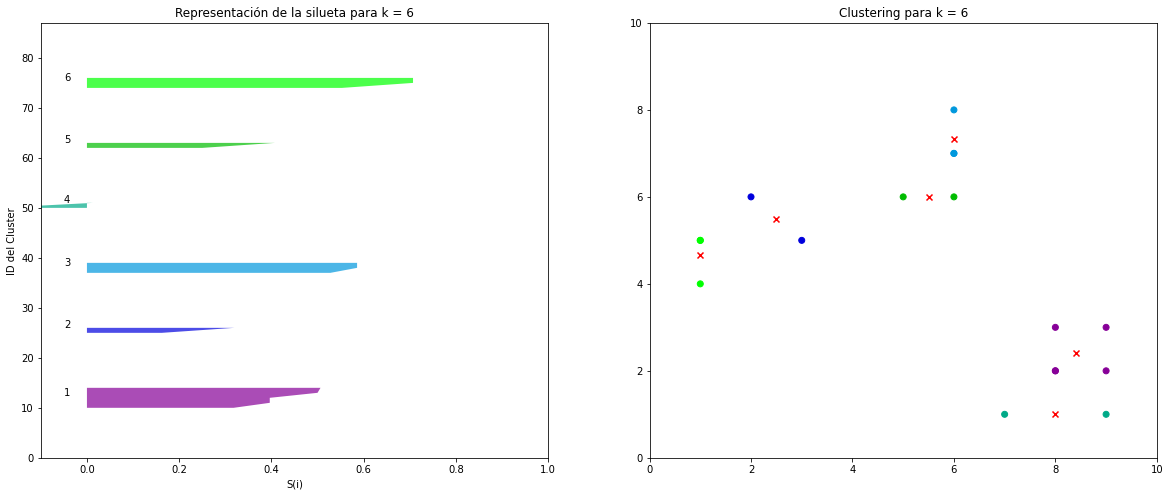

* Para k=  7  2l promedio de la silueta es de  : 0.3800485694524957
       - Para i =  1  la silueta del cluster vale:  0.5664789734180768
       - Para i =  2  la silueta del cluster vale:  0.027847735322324364
       - Para i =  3  la silueta del cluster vale:  0.655666655624379
       - Para i =  4  la silueta del cluster vale:  0.0
       - Para i =  5  la silueta del cluster vale:  0.24096929517637128
       - Para i =  6  la silueta del cluster vale:  0.32882042637679976
       - Para i =  7  la silueta del cluster vale:  0.5237553814972481


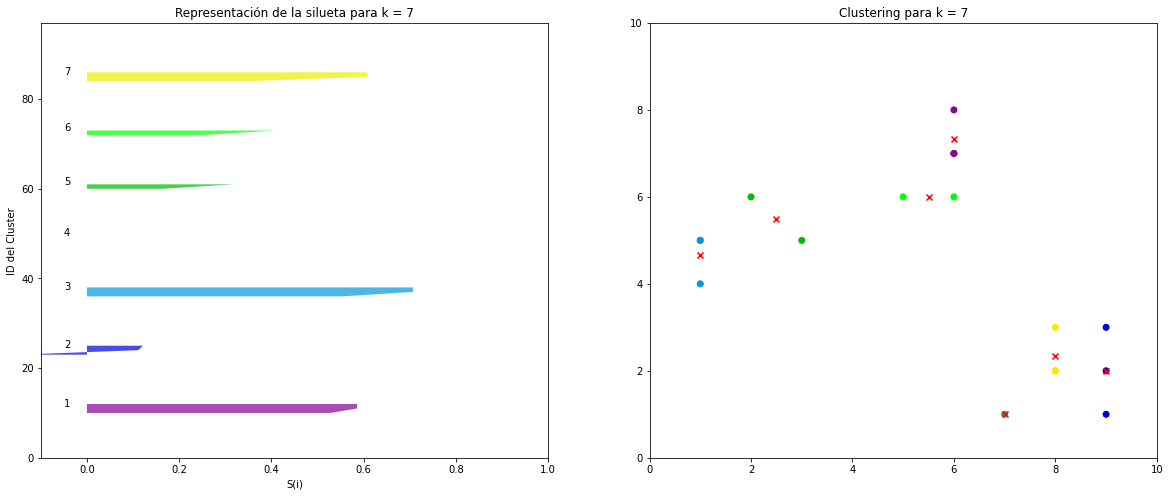

* Para k=  8  2l promedio de la silueta es de  : 0.36739006819239867
       - Para i =  1  la silueta del cluster vale:  0.14644660940672627
       - Para i =  2  la silueta del cluster vale:  0.655666655624379
       - Para i =  3  la silueta del cluster vale:  0.30272654110449826
       - Para i =  4  la silueta del cluster vale:  0.0
       - Para i =  5  la silueta del cluster vale:  0.14644660940672627
       - Para i =  6  la silueta del cluster vale:  0.24096929517637128
       - Para i =  7  la silueta del cluster vale:  0.0
       - Para i =  8  la silueta del cluster vale:  1.0


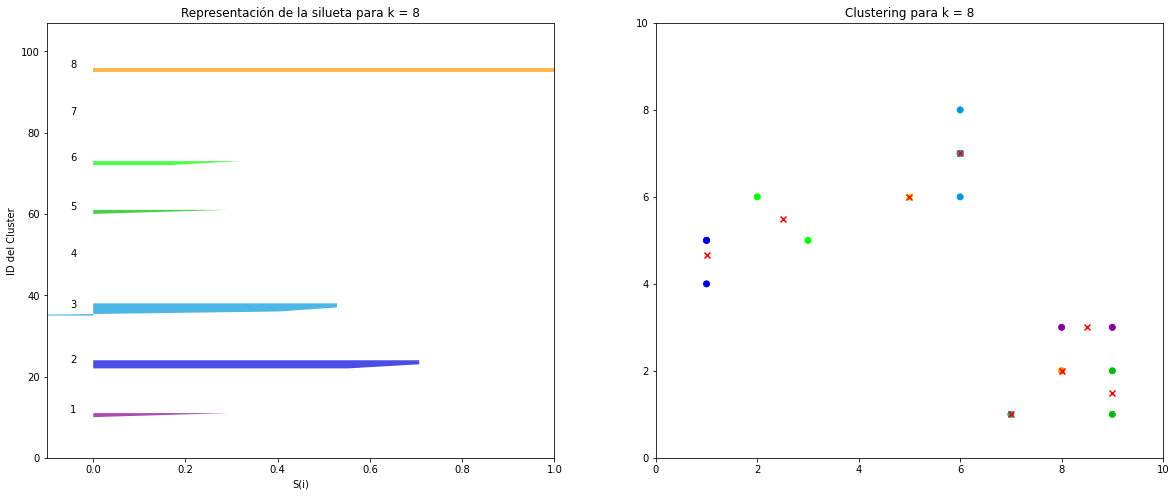

* Para k=  9  2l promedio de la silueta es de  : 0.33600229354373845
       - Para i =  1  la silueta del cluster vale:  0.39052429175126996
       - Para i =  2  la silueta del cluster vale:  0.0
       - Para i =  3  la silueta del cluster vale:  0.5664789734180768
       - Para i =  4  la silueta del cluster vale:  0.6152265411044983
       - Para i =  5  la silueta del cluster vale:  0.32882042637679976
       - Para i =  6  la silueta del cluster vale:  0.16885435933420914
       - Para i =  7  la silueta del cluster vale:  0.0
       - Para i =  8  la silueta del cluster vale:  0.0
       - Para i =  9  la silueta del cluster vale:  0.0


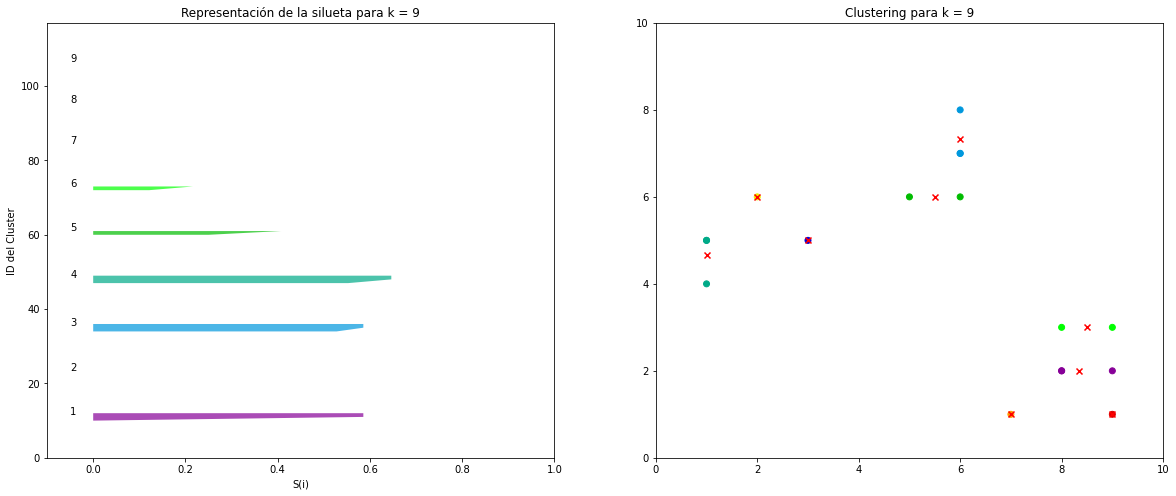

In [ ]:
max_k = 10#max num de cluster que vamos a crear
K = range(1, max_k)
ssw = []#Suma de los cuadrados internos
color_palette = [plt.cm.nipy_spectral(float(i)/max_k) for i in K]
centroid = [sum(X)/len(X) for i in K]
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis = 1))#suma de los cuadrados totales


for k in K:
    kmeanModel = KMeans(n_clusters = k).fit(X)
    
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    
    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis = 1))
    ssw.append(ssw_k)
    
    label_color = [color_palette[i] for i in labels]
    
    
    
    ###Fabricaremos una silueta para cada cluster
    ##Por seguridad, no hacemos silueta si k = 1 0 k= len(X)
    
    if 1<k<len(X):
        ##Crear un subplot de una fila y dos columnas
        fig, (axis1, axis2) = plt.subplots(1,2)
        fig.set_size_inches(20, 8)
        
        #El primer subplot contendrá la silueta, que puede tener valores desde -1 a 1
        #En nuestro caso ya controlamos que los valores estan entre -0.1 y 1
        axis1.set_xlim([-0.1, 1.0])
        #el numero de clusters a insertar determinará el tamaño de cada barra
        #el coeficiente (n_clusters+1)*10 será el espacio en blanco que dejaremos
        #entre siluetas individuales de cada cluster para separarlas.
        axis1.set_ylim([0, len(X) + (k+1)*10])
        
        silhouette_avg = silhouette_score(X, labels)
        print("* Para k= ", k, " 2l promedio de la silueta es de  :", silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, labels)
        
        y_lower = 10
        for i in range(k):
            
            #agregamos la silueta del cluster i-ésimo
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print("       - Para i = ", i+1, " la silueta del cluster vale: ", np.mean(ith_cluster_sv))
            #ordenamos decendientemente las siluetas del cluster i-ésimo
            ith_cluster_sv.sort()
            
            #Calculamos donde colocar la primera silueta en el eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            
            #Elegimo el color del cluster
            color = color_palette[i]
            
            
            #pintamos la silueta del cluster i-ésimo
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, facecolor = color, alpha = 0.7)
            
            
            #Etiquetamos dicho cluster con el numero en el centro
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i+1))
            
            
            #calculamos el nuevo y_lower para el siguiente  cluster del gráfico
            y_lower = y_upper + 10  #dejamos vacias 10 posiciones sin muestra
            
        axis1.set_title("Representación de la silueta para k = %s" %str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del Cluster")
        
        #Fin de la representación de la silueta
        
    ##plot de los k-means con los puntos respectivos
    plt.plot()
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    plt.title("Clustering para k = %s" %str(k))
    plt.scatter(x1, x2, c=label_color)
    plt.scatter(centers[0], centers[1], c='red', marker = "x")
    plt.show()

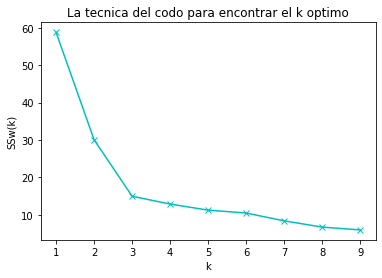

In [ ]:
# Representacion del codo
plt.plot(K, ssw, "cx-")
plt.xlabel("k")
plt.ylabel("SSw(k)")
plt.title("La tecnica del codo para encontrar el k optimo")
plt.show()

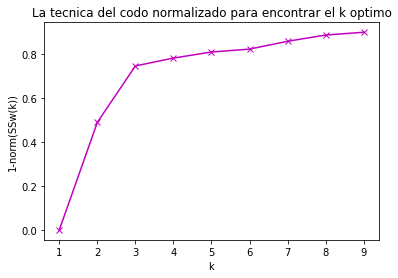

In [ ]:
# Representacion del codo normalizado
plt.plot(K, 1-ssw/sst, "mx-")
plt.xlabel("k")
plt.ylabel("1-norm(SSw(k))")
plt.title("La tecnica del codo normalizado para encontrar el k optimo")
plt.show()